# Data Loading

In [1]:
#import all neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\SREE HARSHA\OneDrive\Documents\OneDrive\Desktop\Internship\Main Flow\superstore_dataset.csv"
data = pd.read_csv(file_path, delimiter=",")
#display first few rows
data.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [3]:
# Get dataset shape
print("Dataset Shape:", data.shape)

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Check data types
print("Data Types:\n", data.dtypes)

Dataset Shape: (9994, 19)
Missing Values:
 order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64
Data Types:
 order_id          object
order_date        object
ship_date         object
customer          object
manufactory       object
product_name      object
segment           object
category          object
subcategory       object
region            object
zip                int64
city              object
state             object
country           object
discount         float64
profit           float64
quantity           int64
sales            float64
profit_margin    float64
dtype: object


In the first step we imported all neccessary libraries
Then we Loaded the dataset using pandas.read_csv()
Then we Displayed the first 5 rows (df.head())
Then we Printed the dataset's shape (rows, columns)
Then we Checked for missing values (isnull().sum())
Then we Displayed the data types (dtypes)

# Data Cleaning

In [4]:
# Remove duplicate rows
data = data.drop_duplicates()

In [5]:
# Fill missing values with median for numerical columns
data["sales"].fillna(data["sales"].median(), inplace=True)
data["profit"].fillna(data["profit"].median(), inplace=True)
data["discount"].fillna(data["discount"].median(), inplace=True)

In [6]:
# Convert 'Date' column to datetime format
data["order_date"] = pd.to_datetime(data["order_date"])
data["ship_date"] = pd.to_datetime(data["ship_date"])

In [7]:
data.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,2019-01-03,2019-01-07,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,2019-01-04,2019-01-08,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,2019-01-05,2019-01-12,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [8]:
# Confirm changes
print("Missing Values After Cleaning:\n", data.isnull().sum())

Missing Values After Cleaning:
 order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64


First we Removed duplicate rows using drop_duplicates(),
Then we Filled missing values in Sales, Profit, and Discount with their median values,
Afterwards we Converted Date to datetime format for time series analysis,
At last we Checked again for missing values after cleaning

# Exploratory Data Analysis

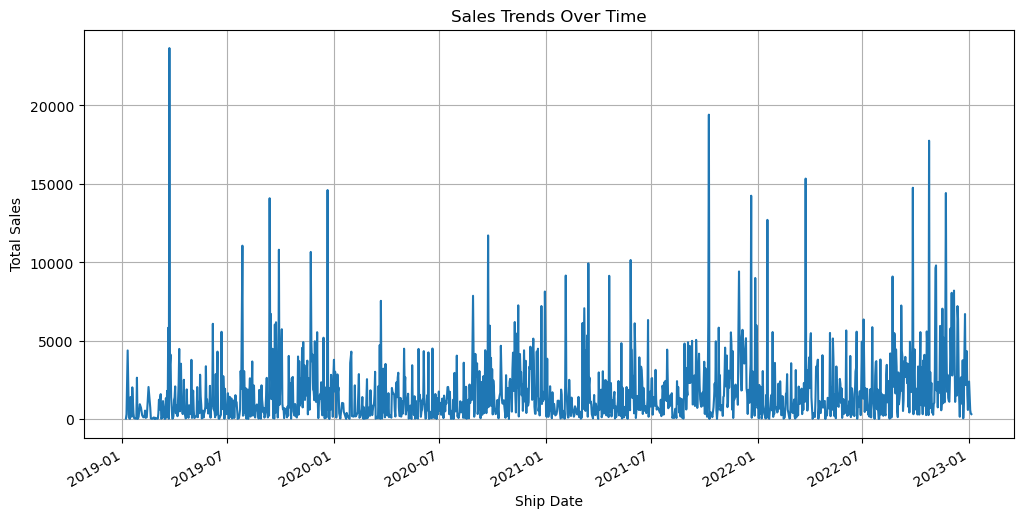

In [9]:
# Aggregate sales over time
data_time_series = data.groupby("ship_date")["sales"].sum()

# Plot time series
plt.figure(figsize=(12, 6))
data_time_series.plot()
plt.xlabel("Ship Date")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.grid(True)
plt.show()

First we Grouped sales by Date and
we Plotted a time series graph using Matplotlib

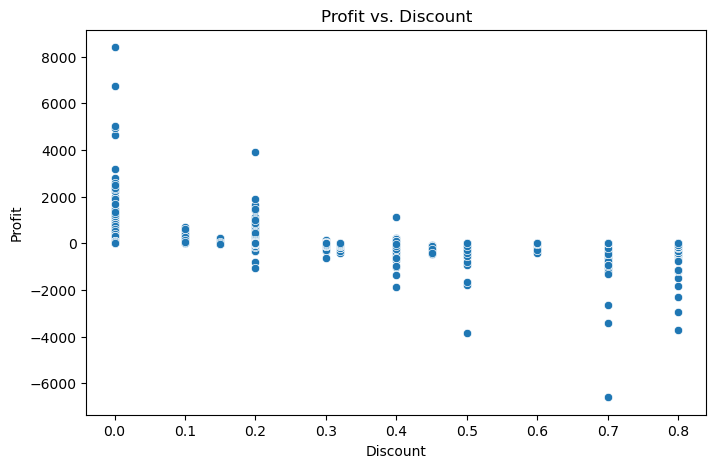

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["discount"], y=data["profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Profit vs. Discount")
plt.show()

The above Scatter plot shows how discounting impacts profit

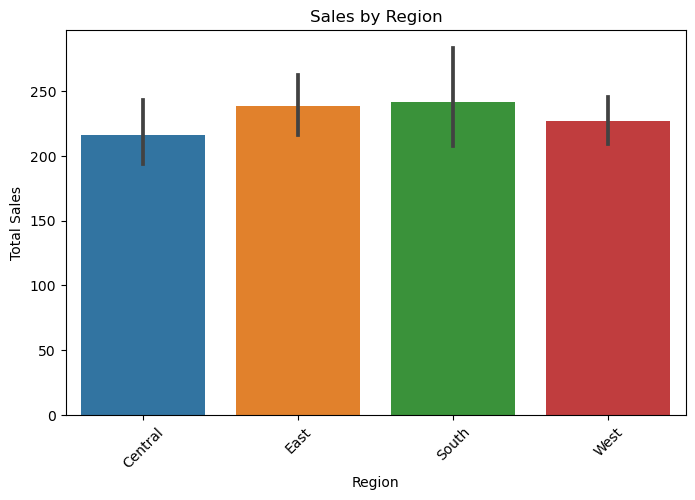

In [11]:
# Sales by Region (Bar Plot)
plt.figure(figsize=(8, 5))
sns.barplot(x=data["region"], y=data["sales"])
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Sales by Region")
plt.show()

The above Bar Plot shows sales by Region

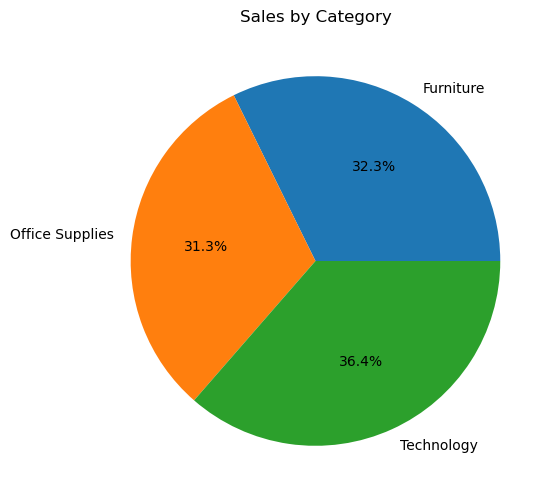

In [12]:
# Sales by Category (Pie Chart)
plt.figure(figsize=(6, 6))
data.groupby("category")["sales"].sum().plot.pie(autopct="%1.1f%%")
plt.title("Sales by Category")
plt.ylabel("")
plt.show()

The above Pie Chart shows sales distribution by Category

# Predictive Modeling

In [13]:
#import all neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# Select features and target variable
X = data[["profit", "discount"]]
y = data["sales"]

In [15]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 227.1795603784354
Mean Squared Error: 190939.07276559155
R-squared Score: 0.4768272238702682


# Insights and Recommendations

Key Insights

Sales and Profit Distribution:
i).The Technology category exhibits the highest sales and profit margins, followed by Office Supplies and Furniture.
ii).Within Sub-Categories, products like Phones and Chairs contribute significantly to revenue.

Regional Performance:
i).The West and East regions outperform the Central and South regions in both sales and profitability.
ii).Certain states within the Central region, such as Texas and Illinois, show lower profit margins despite high sales volumes.

Discount Impact:
i).Higher discount rates are associated with reduced profit margins, particularly in the Furniture category.
ii).Excessive discounts in specific regions lead to negative profitability.

Shipping Modes:
The Standard Class shipping mode is the most utilized; however, Same Day shipping, while less frequent, yields higher profit margins.

Customer Segmentation:
A small segment of customers contributes to a large portion of sales, indicating the presence of high-value customers.

Recommendations

Product Strategy:
i).Focus marketing efforts on high-performing sub-categories like Phones and Chairs.
ii).Reassess the product mix in the Furniture category to enhance profitability.

Regional Initiatives:
i).Develop targeted strategies to boost sales in underperforming regions, especially the Central and South regions.
ii).Investigate factors affecting low profitability in states like Texas and Illinois and implement corrective measures.

Discount Optimization:
i).Implement data-driven discount policies to prevent profit erosion, particularly in categories sensitive to discounts.
ii).Monitor discount effectiveness regularly to ensure alignment with profit goals.

Shipping Efficiency:
i).Promote Same Day shipping for high-margin products to capitalize on its profitability.
ii).Optimize the use of Standard Class shipping to balance cost and customer satisfaction.

Customer Relationship Management:
i).Identify and nurture high-value customers through personalized marketing and loyalty programs.
ii).Analyze purchasing patterns to develop targeted promotions that encourage repeat business.